# Metodo de potencia

In [1]:
class Pot:
    def dom(self,Y):
        high = -np.inf
        for i in Y:
            if(abs(i)>high):
                high = abs(i)
        return high

    def PotMax(self,A_ori,Xj_ori,tol,maxiter):
        A = A_ori
        Xj = Xj_ori
        error = np.inf
        citer = 0
        C0 = 0

        while(citer<maxiter and error>tol):
            Yj = np.dot(A,Xj)
            if(citer == 0):
                C0 = self.dom(Yj)
                Xj = 1/C0 * Yj

            else:
                Cj = self.dom(Yj)
                Xj = 1/Cj * Yj
                error = abs(Cj-C0)
                C0 = Cj
            citer += 1
        return Xj,C0
        
    def PotMin(self,A_ori,Xj_ori,tol,maxiter):
        A = np.linalg.inv(A_ori)
        Xj = Xj_ori

        error = np.inf
        citer = 0
        C0 = 0


        while(citer<maxiter and error>tol):
            Yj = np.dot(A,Xj)
            if(citer == 0):
                C0 = self.dom(Yj)
                Xj = 1/C0 * Yj

            else:
                Cj = self.dom(Yj)
                Xj = 1/Cj * Yj
                error = abs(Cj-C0)
                C0 = Cj
            citer += 1
        return Xj,1/C0


# Metodo Householder

In [2]:
import numpy as np

class Householder:
    
    #def __init__:
    
    def createBigH(self,Hbig,Hlittle):
        rows = len(Hbig) - len(Hlittle)
        columns = len(Hbig[0]) - len(Hlittle[0])
        
        NewH = Hlittle
        
        for i in range(rows):
            NewH = np.concatenate((np.array([np.zeros(len(NewH[0]))]),NewH))
        for i in range(columns,0,-1):
            zeros = np.array([np.zeros(len(NewH))])
            zeros[0][i-1] = 1
            zeros = zeros.T
            NewH = np.concatenate((zeros,NewH),axis=1)
        return NewH
            
    
    def createE(self,lenA):
        e = np.array([np.zeros(lenA)])
        e[0][0] = 1
        return e.T 
    
    def sign(self,a0):
        return a0/abs(a0)
    
    def module(self,a):
        dummy = 0
        for i in range(len(a[0])):
            dummy += (a[0][i])**2
        return dummy**(1/2)
    
    def initIdentity(self,A):
        # Inicializar con 1's la diagonal principal (generar matriz identidad)
        I = np.zeros((len(A),len(A)), dtype = np.float)
        for i in range(len(I)):
            I[i][i] = 1
        return I

    def transformHouseholder(self, A):
        I = self.initIdentity(A)
        
        # Iterar sobre todas las columnas para extraerlas
        row = 0
        An = A
        Q = np.zeros((len(A),len(A[0])),dtype = np.float)
        R = np.zeros((len(A[0]),len(A[0])),dtype = np.float)
        

        #for i in range(len(A[0])):
        for i in range(len(A[0])):
            
            a = np.array([An[:,0]]).T
            module = self.module(a.T)
            
            
            
            In = I[0:len(a),0:len(a)]
            e = np.array([In[:,0]]).T
            
            
            
            V = a + self.sign(a[0]) * module * e
            
            
            
            H = In - 2 * np.matmul(V,V.T) / np.matmul(V.T,V)[0][0]
        
            
            An = np.matmul(H,An)
            
            if(i == 0):
                R = An
                Q = H
                Hbig = H
            else:
                Hn = self.createBigH(Hbig,H)
                R = np.matmul(Hn,R)
                Q = np.matmul(Q,Hn)
            
            
            
            An = An[1:len(An),1:len(An[0])]
            
        return(-1*R,-1*Q)
            

# Metodo de Grahm

In [3]:
import numpy as np

class Gram_S:
    def obtainUk(self,uk,Q,actual_column):
        dummy = np.zeros((len(uk),1))
        for i in range(actual_column):
            ek = np.array([Q[:,i]]).T
            dummy += np.matmul( ek.T,uk)[0][0] * ek
            
        dummy = uk - dummy
        return dummy
            
        
    def module(self,a):
        dummy = 0
        for i in range(len(a[0])):
            dummy += (a[0][i])**2
        return dummy**(1/2)
    
    def creatR(self,A,Q):
        R = np.zeros((len(A[0]),len(A[0])),dtype = np.float)
        for i in range(len(R)):
            ek = np.array([Q[:,i]]).T
            for j in range(i,len(R[0])):
                ak =  np.array([A[:,j]]).T
                R[i][j] = np.matmul( ek.T,ak )[0][0]
        return R
    
    def descGram(self,A):
        Q = np.zeros((len(A),len(A[0])),dtype = np.float)
        R = np.zeros((len(A[0]),len(A[0])),dtype = np.float)
        
        uk = np.array([A[:,0]]).T
        ek = uk / self.module(uk.T)
        Q[:,0] = ek[:,0]
        
        
        for column in range (1,len(A[0])):
            uk = self.obtainUk(np.array([A[:,column]]).T, Q, column)
            ek = uk / self.module(uk.T)
            Q[:,column] = ek[:,0]
        R = self.creatR(A,Q)
        return R,Q

# Metodo De Jacobi

In [4]:
import numpy as np
class Jacobi:
    def searchMax(self,A):
        dummy_max = -np.inf
        i_keep = 0
        j_keep = 0
        for i in range(len(A)):
            for j in range(len(A[0])):
                if(i != j):
                    if( abs(A[i][j]) > dummy_max ):
                        dummy_max = abs(A[i][j])
                        i_keep = i
                        j_keep = j
        return dummy_max,i_keep,j_keep
    
    def signA(self,a):
        if( a == 0):
            return 1
        else:
            return a/abs(a)
    
    def creatIdentity(self,Zeros):
        for i in range(len(Zeros)):
            for j in range(len(Zeros[0])):
                if(i == j):
                    Zeros[i][j] = 1
        return Zeros
    def creatJ(self,T,S,C,A,i,j):
        J = np.zeros((len(A),len(A[0])),dtype = np.float)
        J = self.creatIdentity(J)
        
        J[i][i] = C
        J[j][j] = C
        J[i][j] = S
        J[j][i] = -S
        
        return J
    
    def calcError(self,A):
        dummy = 0.0
        for i in range(len(A)):
            for j in range(len(A[0])):
                if(i != j):
                    dummy += abs(A[i][j])
        return dummy
    
    def Solver(self, An,tol,maxit):
        counter = 0
        error = np.inf
        A = An
        Ev = np.zeros((len(A),len(A[0])),dtype = np.float)
        Ev = self.creatIdentity(Ev)
        
        while( counter<maxit and error>tol ):
        
            a_max,i,j = self.searchMax(A)

            w = (A[j][j] - A[i][i]) / (2 * A[i][j])

            if (w>0):
                T = -w - (w**2 + 1)**(1/2)
            else:
                T = -w + (w**2 + 1)**(1/2)
                
            C = 1 / ( (T**(2) + 1)**(1/2) )
            S = T/( (1+T**2)**(1/2) )
            
            
            J = self.creatJ(T,S,C,A,i,j)

            A = np.matmul(J.T,np.matmul(A,J))
            
            Ev = np.matmul(Ev,J)
            error = abs(self.calcError(A) )
            counter += 1
            
        return A,Ev

# Proyecto

In [5]:
import numpy as np
class ObEigen:
    def calcEr(self,A,An):
        error = 0.0
        for i in range(len(A)):
            error += (A[i][i] - An[i][i])**2
        return (error)**(1/2)
    
    def calcI(self,Qn):
        for i in range(len(Qn)):
            Qn[i][i] = 1
            
    def QRmethod(self,A,maxiter,tol):
        An = A
        Qn = np.zeros((len(A),len(A)),dtype = np.float)
        self.calcI(Qn)
        objG = Gram_S()
        objH = Householder()
        counter = 0
        error = np.inf 
        while(counter < maxiter and error > tol):
            R,Q = objG.descGram(An)
            #R,Q = objH.transformHouseholder(An)
            Ann = np.matmul(R,Q)
            error = self.calcEr(An,Ann)
            An = Ann
            Qn = np.matmul(Qn,Q)
            counter += 1
        return An,Qn,error,counter

class Aux:
    def Normalize(self,V):
        dummy = 0
        Vn = np.array(V)
        for i in range(len(Vn)):
            dummy += Vn[i]
        for i in range(len(V)):
            Vn[i] = Vn[i]/dummy
        return Vn
    
    def QuitZeros(self,M):
        Mn = np.zeros((len(M),len(M)),dtype = np.float)
        for i in range(len(M)):
            Mn[i][i] = M[i][i]
        return Mn
    
    def MatPow_Diag(self,M,n):
        Mn = M
        for i in range(len(Mn)):
            Mn[i][i] = M[i][i] ** (n)
        return Mn
    
    def MatPow(self,M,n):
        Mn = np.zeros((len(M),len(M[0])),dtype = np.float)
        ObEigen().calcI(Mn)
        for i in range(n):
            Mn = np.matmul(Mn,M)
        return Mn
    
    def SearchInd(self,M):
        dummy = 1
        error = np.inf
        keep_index = -1
        for i in range(len(M)):
            value = M[i][i]
            if (abs(value - dummy)<error):
                error = abs(value - dummy)
                keep_index = i
        return keep_index
    def ColSum(self,M):
        dummy = 0
        for i in M:
            dummy += i[0]
        return dummy
        

La matriz de probabilidades original tienen la siguiente forma: 

        0          1           2          3            4           5
0  Paises       EEUA      Canada     España       Mexico          UK
1    EEUA          0     0.86828   0.474902     0.987161    0.461043
2  Canada   0.208397           0  0.0448686   0.00737384    0.342171
3  España  0.0371921  0.00754788          0   0.00456718    0.194405
4  Mexico   0.587893   0.0104336  0.0928832            0  0.00238098
5      UK   0.166518    0.113738   0.387346  0.000898435           0

El valor de cada elemento en la posición [i][j] representa la frecuencia/probabilidad, con la que el país de la columna [j] otorga emigrantes al país de la fila [i]
*--------------------------------------------------------------------------------------------------------------*

El vector inicial de cantidad de emigrantes que cada país provee en el año 0 tiene la siguiente forma: 

EEUA  =  [1296647.]
Canada  =  [950200.]
España  =  [253964.]
Mexi

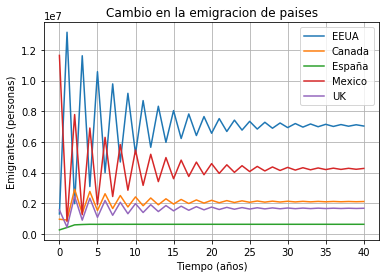

In [88]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt 

def Graph(Time,values,names):
    for i in range(len(values)):
        plt.plot(Time,values[i],label = names[i])
    plt.grid()
    plt.xlabel('Tiempo (años)') 
    plt.ylabel('Emigrantes (personas)') 
    plt.title('Cambio en la emigracion de paises') 
    plt.legend() 
    plt.show()

    
def main():
    A = np.array([[0.4,0.5,0.1],
                 [0.3,0.5,0.0],
                 [0.3,0.0,0.9]],dtype = np.float)
    A = np.array([[0.8,0.03,0.2],
                 [0.1,0.95,0.05],
                 [0.1,0.02,0.75]],dtype = np.float)
    S = np.array([[30],
                 [15],
                 [55]],dtype = np.float)
    names = np.array(("a","b","c"))
    
    df_Matrix_original = pd.read_excel("Libro1.xlsx", sheet_name='Hoja2',header = None)
    
    
    df_Matrix = df_Matrix_original.drop(0, 1)
    names = df_Matrix.iloc[0].values
    df_Matrix = df_Matrix.drop(0, 0)
    array_Matrix = np.array((df_Matrix.values),dtype = np.float)
    
    df_Vector = pd.read_excel("Libro1.xlsx", sheet_name='Hoja3',header = None)
    df_Vector = df_Vector.drop(0, 0)
    array_Vector = np.array((df_Vector.values),dtype = np.float)
    
    A = array_Matrix
    S = array_Vector
    tol = 0.0000001
    maxiter = 1000
    
    print("La matriz de probabilidades original tienen la siguiente forma: \n")
    print(df_Matrix_original)
    print("\nEl valor de cada elemento en la posición [i][j] representa la frecuencia/probabilidad, con la que el país de la columna [j] otorga emigrantes al país de la fila [i]")
    
    print("*--------------------------------------------------------------------------------------------------------------*")
    
    print("\nEl vector inicial de cantidad de emigrantes que cada país provee en el año 0 tiene la siguiente forma: \n")
    for i in range(len(names)):
        print(names[i], " = ", S[i])
    
    print("*--------------------------------------------------------------------------------------------------------------*")
    
    Eigen_values_QR, Eigen_vectors_QR, error, counter = ObEigen().QRmethod(A,maxiter,tol)
    final_Eigen_vector_QR = Aux().Normalize(Eigen_vectors_QR[:,Aux().SearchInd(Eigen_values_QR)])
    Xj = np.ones(len(A),dtype = np.float)
    Eigen_vector_Pot,Eigen_value_Pot = Pot().PotMax(A,Xj,tol,maxiter)
    final_Eigen_vector_Pot = Aux().Normalize(Eigen_vector_Pot)
    
    
    print("\nSe puede predecir el vector final al cual la matriz de probabilidad va a converger sin importar el vector inicial")
    print("Esto se hace encontrando aquel eigenvector de la matriz de probabilidad que esté asociado específicamente al eigenvalor de de 1")
    print("\nUtilizando el método de potencias, el eigenvector asociado al eigenvalor de 1 es el siguiente: \n", final_Eigen_vector_Pot)
    print("\nUtilizando el método de Gram S, el eigenvector asociado al eigenvalor de 1 es el siguiente: \n", final_Eigen_vector_QR)
    print("\nEste vector asociado al eigenvalor de 1 va a ser el que cumpla que P*Vk = Vk, lo que quiere decir que apesar que se le esté aplicando una matriz de probabilidad al vector, este ya no cambia lo que quiere decir que se alcanzó la convergencia y se encontró al 'vector final'")
    print("Los anteriores eigenvectores ya está normalizados, pero ahora deben ser multiplicados por el número total de migrantes que se están considerando en en el vector inicial, esto para tener al vector final en unidades de personas emigrantes, y no en unidades de porcentaje")
    Total_migration = Aux().ColSum(S)
    final_Eigen_vector_Pot = Total_migration * final_Eigen_vector_Pot
    final_Eigen_vector_QR = Total_migration * final_Eigen_vector_QR
    print("\nEntonces, el vector final calculado por el método de las potencias tiene la siguiente forma: ")
    for i in range(len(names)):
        print(names[i], " = ", final_Eigen_vector_Pot[i])
    print("\nEl vector final calculado por el método de descomposicion QR tiene la siguiente forma: ")
    for i in range(len(names)):
        print(names[i], " = ", final_Eigen_vector_QR[i])
        
    print("*--------------------------------------------------------------------------------------------------------------*")

    n = np.arange(41)
    historic_values = np.empty((len(S),0),dtype = np.float)
    for i in n:
        Eigen_values_n = Aux().MatPow(Eigen_values_QR,i)
        P = np.matmul(Eigen_vectors_QR,np.matmul(Eigen_values_n,np.linalg.inv(Eigen_vectors_QR)))
        actual_eigen_vector = np.matmul(P,S)
        historic_values = np.append(historic_values,actual_eigen_vector,axis = 1)
    
    print("\nUtilizando la ecuación P^n * Vk = Vk1, y luego de" , len(n)," iteraciones, se obtuvo la siguiente tabla de evoluciones del vector inicial de población migratoria: ")
    for i in range(len(names)):
        print(names[i], " = ", historic_values[i])
    
    print("*--------------------------------------------------------------------------------------------------------------*")
    print("\nDespues de ", len(n), "iteraciones, la evolución del vector inicial convergió a un vector final de la forma; ")
    for i in range(len(names)):
        print(names[i], " = ", historic_values[i][-1])
    print("*--------------------------------------------------------------------------------------------------------------*")
    print("\nLa grafica de evolucion de la cantidad de personas emigrantes de cada país es la siguiente: \n")
    Graph(n,historic_values,names)
    

if __name__ == '__main__':
    main()

